In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np
from scipy import spatial as spatial
import matplotlib.pyplot as plt
from matplotlib import rcParams as rc
rc['grid.linewidth']=0


In [112]:
xyz=np.load('test_out/traj_test_positions.npy')
print(xyz.shape)

(20, 100, 3)


In [113]:
%matplotlib ipympl
fig = plt.figure()
ax = fig.add_axes([0,0,2,2],projection='3d')
# ax = fig.add_axes([0,0,1,1],)
# quiver = ax.quiver([],[],[],[])
#quiver = ax.quiver([],[],[],[],[],[])
R0=10
N=50

ax.scatter(xyz[0,:N,0],xyz[0,:N,1],xyz[0,:N,2],'o',color='C0')
ax.scatter(xyz[0,N:,0],xyz[0,N:,1],xyz[0,N:,2],'o',color='C1')
ax.set_zlim(-R0, R0)
ax.set_xlim(-R0, R0)
ax.set_ylim(-R0, R0)

s = 25#((ax.get_window_extent().width  / (2*R0) * 72./fig.dpi) ** 2)

def update(ii):
    fig.clear()
    ax = fig.add_axes([0,0,1,1],projection='3d')
    # ax = fig.add_axes([0,0,1,1],)

    p=xyz[ii]
    # print(p.shape)
    # line.set_data(p[:,0],p[:,1])
    # line.set_3d_properties(p[:,2])
    # plt.draw()
    # ax.plot(p[10:13,0],p[10:13,1],p[10:13,2],'o',color='C0',alpha=1)
    ax.scatter(p[:N,0],p[:N,1],p[:N,2],'o',color='C0',s=s)
    # ax.scatter(p[:,0],p[:,1],p[:,2],'o',color='C0')
    # ax.plot(p[300:303,0],p[300:303,1],p[300:303,2],'o',color='C1',alpha=1)
    ax.scatter(p[N:,0],p[N:,1],p[N:,2],'o',color='C1',s=s)
    # ax.plot(masked_xyz[:100,0],masked_xyz[:100,1],'go',markersize=3)
    ax.text(-10,-10,10,ii)
    ax.set_zlim(-R0, R0)
    ax.set_xlim(-R0, R0)
    ax.set_ylim(-R0, R0)
    
    # return line,

#update(10)
ani = FuncAnimation(fig, update, frames=np.arange(1,xyz.shape[0],1), interval=200, blit=True,repeat=False)

# ani.save('ani_sticky_gas_T0.1_F0.1_Ta10-R20.gif', writer='pillow')
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  


(-25.0, 15.0)

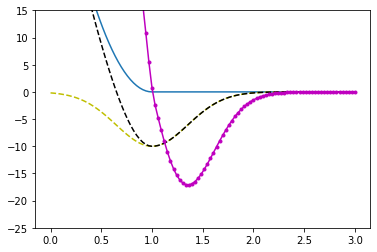

In [57]:
%matplotlib inline
rs=np.linspace(0.0,3,100)

epsi=1
alp=-10
LJ_r12=4*epsi/rs**12
LJ_r6=4*epsi/rs**6
LJ=LJ_r12-LJ_r6
mu=4
r_repel=1.
r_well=1.
Gaus_well=alp*np.exp(-mu*(rs-r_well)**2)

Harm_repel=0.5*100*(rs-r_repel)**2*np.heaviside(r_repel-rs,0.0)


# Etype=alp*0.5*(1+np.tanh(mu*(rc-rs)))*np.heaviside(rs-rc1,0.5)
# plt.plot(rs, LJ_r12,'r--')
plt.plot(rs,Harm_repel)
# plt.plot(rs, 0.5*LJ_r12,'g--')
# plt.plot(rs,-np.gradient(LJ)/np.gradient(rs),'r-')
# plt.plot(rs,-0.5*np.gradient(LJ)/np.gradient(rs),'g-')
#  plt.plot(rs,LJ_r6,'g--')
# plt.plot(rs,Etype,'y--')
plt.plot(rs,Gaus_well,'y--')
plt.plot(rs,Gaus_well+Harm_repel,'k--')
plt.plot(rs,-np.gradient(Gaus_well+Harm_repel)/np.gradient(rs),'m.-')
# plt.plot(rs,Etype+Harm_repel,'k--')
# plt.plot(rs,-np.gradient(Etype+Harm_repel)/np.gradient(rs),'m-')
# plt.plot(rs, LJ_r12-LJ_r6,'k:')
plt.ylim(-25,15)
# plt.yscale('SymLog')
# plt.axvline(1.5)
# plt.axhline(0)

(200000,)


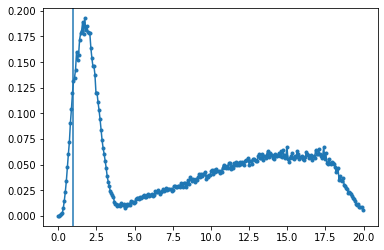

In [114]:
%matplotlib inline
distances=[]
for t in range(xyz.shape[0]):
    d=spatial.distance.cdist(xyz[t],xyz[t],metric='euclidean')
    np.fill_diagonal(d,1e5)
    distances.append(np.ravel(d))
distances=np.ravel(distances)
print(distances.shape)
hist,bin_edges=np.histogram(distances, bins=np.linspace(0,20,300), density=True)

plt.plot(bin_edges[:-1],hist,'.-')
# plt.xlim(0,10)
plt.axvline(1.)
# plt.semilogx()

In [66]:
d=spatial.distance.cdist(xyz[0],xyz[0],metric='euclidean')
print(np.fill_diagonal(d,1))

None


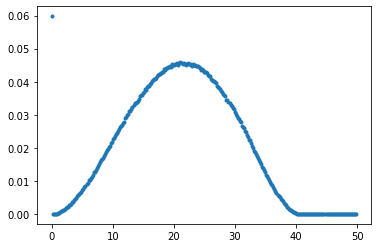

In [62]:
100/(8*5**3)

0.1